# BP1 - Interpreting random forest using decision rules

-------
# Experiment 1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

In [3]:
data = pd.read_csv('datasets/iris-data.csv')
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [6]:
data.loc[data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
data.loc[data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

In [7]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/Users/edvin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/edvin/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/edvin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


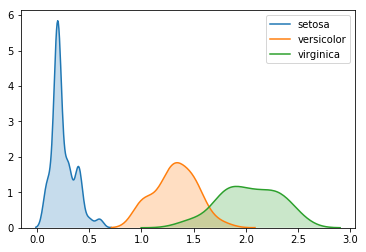

In [9]:
sns.kdeplot(data.loc[data['class'] == 'Iris-setosa', 'petal_width_cm'], shade=True, label='setosa')
sns.kdeplot(data.loc[data['class'] == 'Iris-versicolor', 'petal_width_cm'], shade=True, label='versicolor')
sns.kdeplot(data.loc[data['class'] == 'Iris-virginica', 'petal_width_cm'], shade=True, label='virginica')

In [10]:
data[data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [11]:
setosa_petal_width_mean = data.loc[data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

In [12]:
data.loc[(data['class'] == 'Iris-setosa') & data['petal_width_cm'].isnull(), 'petal_width_cm'] = setosa_petal_width_mean

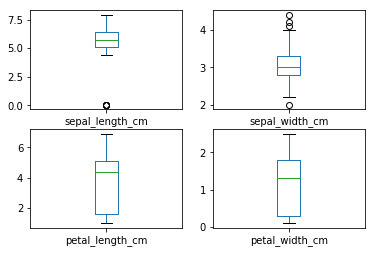

In [13]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

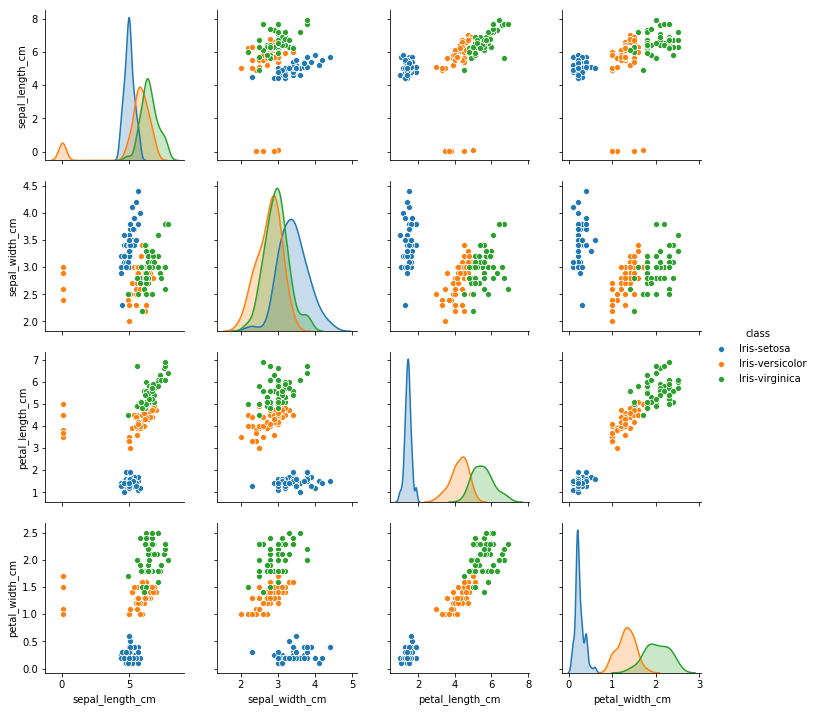

In [14]:
sns.pairplot(data, hue="class")

In [15]:
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.478409
sepal_width_cm,0.066091,1.000000,-0.419796,-0.359236
petal_length_cm,0.489083,-0.419796,1.000000,0.961173
petal_width_cm,0.478409,-0.359236,0.961173,1.000000


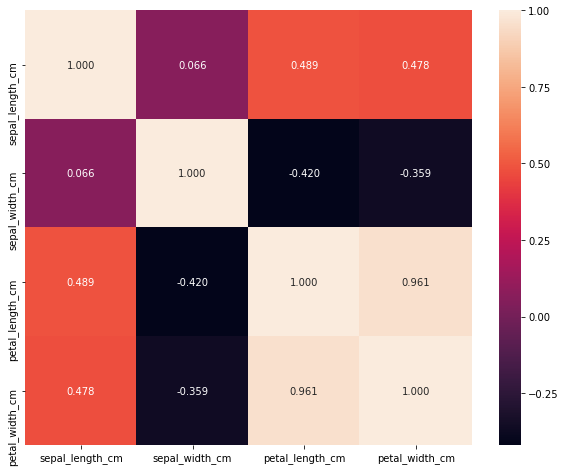

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

-----
-----
-----
-----
## Split to train & test datasets

In [17]:
from sklearn import model_selection

In [18]:
array = data.values
X = array[0:, 0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_validation = le.fit_transform(Y_validation)

-----

## Natrenovanie rozhodovacieho stromu

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
pred = clf.predict(X_validation)

In [25]:
print(accuracy_score(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [26]:
feature_names_array = data.columns.values[:-1]

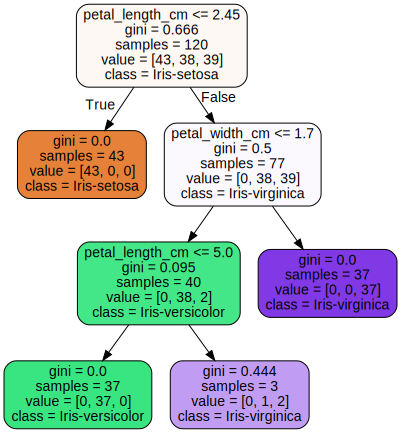

In [27]:
viz_tree(clf, data['class'].unique(), feature_names_array)

In [28]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [29]:
print(children_left)
print(children_right)

[ 1 -1  3  4 -1 -1 -1]
[ 2 -1  6  5 -1 -1 -1]


In [30]:
print(feature)

[ 2 -2  3  2 -2 -2 -2]


-------
## Important classes for single tree interpretation

In [21]:
from sympy.logic import simplify_logic
from sympy.abc import x, y, z
from sympy import *
from sympy.logic.boolalg import *
from sympy.logic.inference import satisfiable

from pyeda.inter import *
from itertools import product
from pypred import OptimizedPredicateSet, PredicateSet, Predicate
from collections import OrderedDict

import uuid
import operator

import graphviz
from sklearn import tree

def viz_tree(clf, class_names, feature_names):
    tree_ = tree.export_graphviz(clf, out_file = None, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
    graph = graphviz.Source(tree_)
    return graph


def get_truth(inp, relate, cut):
    ops = {'>': operator.gt,
           '<': operator.lt,
           '>=': operator.ge,
           '<=': operator.le,
           '=': operator.eq}
    return ops[relate](inp, cut)


def get_leaf_class_name(class_names, node_values):
    max_value_index = 0
    max_value = 0
    for c, value in enumerate(node_values[0]):
        if value != 0 and value > max_value:
            max_value_index = c
            max_value = value
    
    return class_names[max_value_index]

        
def get_node_value(node_values):
    max_ = 0
    for c, value in enumerate(node_values[0]):
        if value > max_:
            max_ = value
            
    return max_
        
        
def get_paths_for(class_name, tree, cur_index, lst, paths, sign):
    if cur_index >= len(tree.children_left):
        return
    
    if len(lst) > 0 and cur_index != -1:
        lst[len(lst) - 1] = (lst[len(lst) - 1][0], lst[len(lst) - 1][1], sign, lst[len(lst) - 1][3])
        
    lst.append((cur_index, tree.feature[cur_index], sign, round(tree.threshold[cur_index], 2)))
    if cur_index != -1:
        get_paths_for(class_name, tree, tree.children_left[cur_index], lst, paths, '<=')
        get_paths_for(class_name, tree, tree.children_right[cur_index], lst, paths, '>')
    else:
        if get_leaf_class_name(data['class'].unique(), tree.value[list(lst[-2])[0]]) == class_name:
            paths.add(tuple(lst[:-1]))
        
    lst.pop()
    
    
def get_feature_value_pairs(tree, paths):
    
    pairs = []
    for path in paths:
        d = []
        features = tree.feature
        thresholds = tree.threshold

        for i, p in enumerate(list(path[:-1])):
            d.append((i, features[i], thresholds[i]))

        pairs.append(d)
        
    return pairs


def rule_predict(class_name, rule):
    pred = []
    
    for row in X_validation:
        
        valid = True
        for condition in rule[:-1]:
            condition = list(condition)
            
            if not get_truth(row[condition[1]], condition[2], condition[3]):
                valid = False
            
        if valid:
            pred.append(class_name)
        else:
            pred.append(-1)
            
    return pred


# Function which computes rule accuracy based. It makes a classification report and takes
# the precision value and returns it
def compute_rule_accuracy(class_name, rule):
    pred = rule_predict(class_name, rule)
    report = classification_report(pred, Y_validation, output_dict = True)
    
    return round(report[str(class_name)]['precision'], 2)


def prune_rule(class_name, rule):
    max_accuracy = 0
    final_rule = rule
    
    for i in range(len(rule[:-1])):
        accuracy = compute_rule_accuracy(class_name, rule[i:])
        
        if accuracy > max_accuracy:
            final_rule = rule[i:]
            max_accuracy = accuracy
           
    return (max_accuracy, tuple(final_rule))


def combine_rules(class_name, rf_model):
    rules = set()
    
    for estimator in rf_model.estimators_:
        get_paths_for(class_name, estimator.tree_, 0, [], rules, '<=')
        
    return rules


def get_class_index(class_name):
    for c, cls in enumerate(data['class'].unique()):
        if cls == class_name:
            return c
        
        
def get_rules_accuracy(class_name, rf_model, removeRedundancy = False):
    rules = combine_rules(class_name, rf_model)
    
    if removeRedundancy:
        rules = redundancy_condition_removal(rules)
    
    rules = list(rules)
    
    final_rules = set()
    for rule in rules:
        rule_ = [compute_rule_accuracy(get_class_index(class_name), rule), rule]
        final_rules.add(tuple(rule_))
        
    return sorted(list(final_rules), reverse=True, key=lambda x: list(x)[0])
    
        
def get_pruned_rules_accuracy(class_name, rf_model):
    rules = list(combine_rules(class_name, rf_model))
    
    final_rules = set()
    for rule in rules:
        pruned = prune_rule(get_class_index(class_name), list(rule))
        final_rules.add(tuple(pruned))
    
    return sorted(list(final_rules), reverse=True, key=lambda x: list(x)[0])


def redundancy_condition_removal(rule_set):
    output = set()
    
    for rule in list(rule_set):
        
        rule = list(rule)
        for i, cond in enumerate(rule[:-1]):
            cond = list(cond)
            
            for cond2 in rule[i + 1:-1]:
                cond2 = list(cond2)
                    
                if cond[1] == cond2[1] and cond[2] == cond2[2]:
                    if cond[2] == '>':
                        cond[3] = (cond[3] if cond[3] > cond2[3] else cond2[3])
                    else:
                        cond[3] = (cond[3] if cond[3] < cond2[3] else cond2[3])
                        
                    # Assign changed rule to condition
                    rule[i] = tuple(cond)
                    
                    # Remove redundant rule from list
                    rule.remove(tuple(cond2))
                
        output.add(tuple(rule))
        
    return output


def create_big_or_rule(rule_set):
    output = ""
    for i, rule in enumerate(list(rule_set)):
        output += create_and_expression(rule)
        
        if len(rule_set) - 1 != i:
            output += " | "
            
    return output


def create_big_and_rule(rule_set):
    output = ""
    for i, rule in enumerate(list(rule_set)):
        output += create_and_expression(rule)
        
        if len(rule_set) - 1 != i:
            output += " & "
            
    return output


def combine_rule_using_and(rule_set):
    output = ""
    for i, rule in enumerate(list(rule_set)):
        output += "(" + rule + ")"
            
        if len(rule_set) - 1 != i:
            output += " & "
            
    return output


def combine_forest_rules(rf_model, class_name, r_dict, v_dict):
    final_rule = set()
    simplified_final_rule = set()
    for estimator in rf_model.estimators_:
    
        rules = set()
        get_paths_for(class_name, estimator.tree_, 0, [], rules, '<=')
        
        rules = redundancy_condition_removal(rules)
        tree_rule = sympify(create_big_or_rule(rules), evaluate=False)
        print(tree_rule)
        
        final_rule.add(str(tree_rule))
        simplified_final_rule.add(str(simplify_logic(tree_rule)))
        
        
    return final_rule, simplified_final_rule


def create_and_expression(rule):
    output = ""
    
    for i, condition in enumerate(list(rule)[:-1]):
        condition = list(condition)
        key = str(condition[1]) + str(condition[3])
        
        var = "A" + uuid.uuid4().hex[:6].upper()
        
        if key in rule_dict:
            if condition[2] != rule_dict[key][0]:
                output += "Not(" + rule_dict[key][1] + ")"
            else:
                output += rule_dict[key][1]
        else:
            expr = var + ' = ' + 'symbols(\'' + (str(condition[1]) + condition[2] + str(condition[3])) + '\')'
            exec(expr)
            
            rule_dict[key] = [condition[2], var]
            output += var
        
            # Also push to rule_dict where key is the variable name and value is the rule
            var_dict[var] = condition
        
        if len(list(rule)[:-1]) - 1 != i:
            output += " & "
        
    return "(" + output + ")"


def print_final_rule(simplified_rule):
    simplified_rule = str(simplified_rule).split()
    
    final_rule = ""
    for el in simplified_rule:
        if el in ('&', '|'):
            final_rule += " " + el + " "
        else:
            if "~" in el:
                el = el.replace("~", "")
                el_ = el
                
                lb_count = el_.count('(')
                if "(" in el_:
                    el_ = el_.replace("(", "")
                
                rb_count = el_.count(')')
                if ")" in el_:
                    el_ = el_.replace(")", "")
                
                var = var_dict[str(el_)].copy()[1:]
                if var[1] == '>':
                    var[1] = '<='
                else:
                    var[1] = '>'
                  
                if lb_count == 0 and rb_count == 0:
                    final_rule += str(tuple(var))
                elif lb_count != 0 and rb_count == 0:
                    final_rule += ("(" * lb_count) + str(tuple(var))
                elif lb_count == 0 and rb_count != 0:
                    final_rule += str(tuple(var)) + (")" * rb_count)
            
            elif "(" in el:
                b_count = el.count('(')
                
                el = el.replace("(", "")
                final_rule += ("(" * b_count) + str(tuple(var_dict[str(el)][1:]))
                
            elif ")" in el:
                b_count = el.count(')')
                
                el = el.replace(")", "")
                final_rule += str(tuple(var_dict[str(el)][1:])) + (")" * b_count)
            
            else:
                final_rule += str(tuple(var_dict[str(el)][1:]))
            
    return final_rule


def convert_to_function(sign, expr_):
    rule = ""
    for i, el in enumerate(expr_.xs):
        if "And" in str(el):
            rule += "(" + convert_to_function("&", el) + ")"
        elif "Or" in str(el):
            rule += "(" + convert_to_function("|", el) + ")"
        else:
            rule += str(el)
            
        if i != len(expr_.xs) - 1:
            rule += " " + sign + " "
            
    return rule


def get_valid_predicate(rule):
    rule = rule.replace("&", "and").replace("|", "or").replace("0, '", 'sepal_length_cm ').replace("1, '", 'sepal_width_cm ')
    rule = rule.replace("2, '", 'petal_length_cm ').replace("3, '", 'petal_width_cm ').replace("',", "")
    
    return rule
    
    
def predict_rule_class(rule_set):
    X = X_train
    Y = Y_train
    
    Z = predicate_rules_set_predict(rules_set, X_validation)
    
    print(accuracy_score(Y_validation, Z))
    print(classification_report(Z, Y_validation))
    
    
def compute_final_rule_accuracy(class_index, rule):
    X = X_validation
    Y = Y_validation
    
    # Classification report
    Z = compute_rule_accuracy(class_index, rule, X)

    report = classification_report(Z, Y, output_dict = True)
    print(report[str(class_index)])
    
    
def compute_rule_accuracy(class_name, rule, dataset):
    """This method allows you to evaluate the whole rule given by 'rule' parameter to 'class_name'
    Returns an array of evaluated rule
    """
    
    pred = []
    
    # Store dataframe attribute names
    df_columns = list(data.columns.values[:-1])
    
    # Create an ordered dictionary in order to keep the order when we take values for given columns
    d_ = OrderedDict()
    
    # Create and optimize predicate given by the parameter
    test = Predicate(rule)
    s = OptimizedPredicateSet([test])
    
    for row in dataset:
        
        # Create dictionary consisting of attribute names and corresponding row values for them
        for l, at in enumerate(df_columns):
            d_[at] = row[l]
        
        # Evaluate rule with created dictionary
        match = s.evaluate(dict(d_))
            
        # If the conditions from rule were met, append the class to final predictions array
        if len(match):
            pred.append(class_name)
        else:
            pred.append(-1)
            
    return pred


def attribute_rule_predict(class_name, rule, attr1, attr2, dataset):
    """Method used to get prediction only for two attributes given by 'attr1' and 'attr2' parameters
    This method is mainly used mainly for plotting purposes
    """ 
    
    # Create an empty predictions array
    pred = []
    
    # Create and optimize predicate given by the parameter
    test = Predicate(rule)
    s = OptimizedPredicateSet([test])
    
    # Store dataframe attribute names
    df_columns = list(data.columns.values[:-1])
    
    # Create dictionary in which we will create the predicate
    d_ = dict()
    
    for row in dataset:
        
        # Get the attribute names by indexes from df_columns.
        d_[df_columns[attr1]] = row[0]
        d_[df_columns[attr2]] = row[1]
    
        # Evaluate rule with created dictionary
        match = s.evaluate(d_)
            
        # If the conditions from rule were met, append the class to final predictions array
        if len(match):
            pred.append(class_name)
        else:
            pred.append(-1)
            
    return pred


def visualize_decision_boundaries(rule, attr1, attr2):
    """
    This function is used to draw decision boundaries for 2 attributes which will be used to predict the output
    """
    
    # Create a dataset from validation data having only columns specified by paramters
    X = X_validation[:, [attr1, attr2]]
    Y = Y_validation

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(figsize=(10, 8))

    # Create prediction
    ravel_ = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(attribute_rule_predict(1, rule, attr1, attr2, ravel_))
    Z = Z.reshape(xx.shape)
    
    # Plot predicted dots
    axarr.contourf(xx, yy, Z, alpha=0.5)
    axarr.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor='k')
    axarr.set_title("When random forest is very sure")

    plt.show()
    
    
def predicate_rules_set_predict(rules_set, dataset):
    
    pred = []
    
    df_columns = list(data.columns.values[:-1])
    d_ = OrderedDict()
    
    w_set = set()
    for r in rules_set:
        r = (r[0], OptimizedPredicateSet([Predicate(r[1])]))
        w_set.add(r)
        
    for i, row in enumerate(dataset):
        
        
        for l, at in enumerate(df_columns):
            d_[at] = row[l]
            
        
        j = 0
        for r in w_set:
            class_i = r[0]
            rule_p = r[1]

            match = rule_p.evaluate(dict(d_))

            if len(match):
                pred.append(class_i)
                break
        
            j += 1
            
        if j == len(w_set):
            pred.append(-1)
        
    return pred


def redundancy_condition_removal_(rule_set):
    output = set()
    
    for rule in list(rule_set):
        
        rule = list(rule)
        for i, cond in enumerate(rule):
            cond = list(cond)
            
            for cond2 in rule[i + 1:]:
                cond2 = list(cond2)
                    
                if cond[0] == cond2[0] and cond[1] == cond2[1]:
                    if cond[1] == '>':
                        cond[2] = (cond[2] if cond[2] > cond2[2] else cond2[2])
                    else:
                        cond[2] = (cond[2] if cond[2] < cond2[2] else cond2[2])
                        
                    # Assign changed rule to condition
                    rule[i] = tuple(cond)
                    
                    # Remove redundant rule from list
                    rule.remove(tuple(cond2))
                
        output.add(tuple(rule))
        
    return output


def split_rules(rule_str):
    redundant_rules_set = set()
    composed_rules_set = set()
    
    rule = ""
    stack = []
    
    for c in rule_str:
        
        if c in (' ', '&', '|') and len(stack) == 0:
            continue
            
        rule += c
        
        if c == "(":
            stack.append(c)
        
        if c == ")" and len(stack) == 1:
            stack.pop()
            
            if len(stack) == 0:
                try:
                    redundant_rules_set.add(eval(rule))
                except:
                    composed_rules_set.add(rule)
            
            rule = ""
            
        elif c == ')':
            stack.pop()
            
    return redundant_rules_set, composed_rules_set


def compose_final_rule(no_redundant_rules, composed_rules_set):
    final_rule = ""
    
    for i, rule in enumerate(no_redundant_rules):
        final_rule += str(rule) + " & "
            
    for i, rule in enumerate(composed_rules_set):
        final_rule += rule
        
        if len(composed_rules_set) - 1 != i:
            final_rule += " & "
        
    return final_rule

In [41]:
rules_set = set()
get_paths_for("Iris-virginica", clf.tree_, 0, [], rules_set, '<=')
rules_set

{((0, 2, '>', 2.45), (2, 3, '<=', 1.7), (3, 2, '>', 5.0), (5, -2, '>', -2.0)),
 ((0, 2, '>', 2.45), (2, 3, '>', 1.7), (6, -2, '>', -2.0))}

In [42]:
rules_set = redundancy_condition_removal(rules_set)
rules_set

{((0, 2, '>', 2.45), (2, 3, '>', 1.7), (6, -2, '>', -2.0)),
 ((0, 2, '>', 5.0), (2, 3, '<=', 1.7), (5, -2, '>', -2.0))}

In [43]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [44]:
#compute_rule_accuracy(2, [(0, 3, '>', 0.8), (5, -2, '>', -2.0)])

In [45]:
prune_rule(2, [(0, 3, '>', 0.8), (2, 3, '>', 1.7), (6, -2, '>', -2.0)])

TypeError: compute_rule_accuracy() missing 1 required positional argument: 'dataset'

In [46]:
compute_rule_accuracy(2, [(0, 2, '>', 2.45), (2, 3, '>', 1.7), (6, -2, '>', -2.0)])

TypeError: compute_rule_accuracy() missing 1 required positional argument: 'dataset'

In [ ]:
prune_rule(2, [(0, 2, '>', 2.45), (2, 3, '>', 1.7), (6, -2, '>', -2.0)])

----

-----
## Natrenovanie random forestu

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=5, max_depth=4)
rfclf.fit(X_train, Y_train)

pred = rfclf.predict(X_validation)

### Simplifikacia pravidiel jedneho stromu pouzijuc booleansku algebru

In [106]:
rule_dict = {}
var_dict = {}

rules, s_rules = combine_forest_rules(rfclf, "Iris-virginica", rule_dict, var_dict)
rules

(A856EF6 & ACEB9E9 & AD5ED65) | (A9C8E0C & AD5ED65 & ~A856EF6)
(AD5ED65 & ~A94F079) | (A306C98 & A676BF2 & A94F079)
~A94F079 | (A2592C6 & A76C87C & A94F079 & AA0B165)
(ACD33F3 & ~A94F079) | (A306C98 & A94F079 & A9C8E0C & ACD33F3)
(A64B709 & A76C87C) | (A8DB128 & AD5ED65 & ~A64B709)


{'(A64B709 & A76C87C) | (A8DB128 & AD5ED65 & ~A64B709)',
 '(A856EF6 & ACEB9E9 & AD5ED65) | (A9C8E0C & AD5ED65 & ~A856EF6)',
 '(ACD33F3 & ~A94F079) | (A306C98 & A94F079 & A9C8E0C & ACD33F3)',
 '(AD5ED65 & ~A94F079) | (A306C98 & A676BF2 & A94F079)',
 '~A94F079 | (A2592C6 & A76C87C & A94F079 & AA0B165)'}

In [107]:
s_rules

{'(A64B709 | A8DB128) & (A64B709 | AD5ED65) & (A76C87C | ~A64B709)',
 '(A94F079 | AD5ED65) & (A306C98 | ~A94F079) & (A676BF2 | ~A94F079)',
 'ACD33F3 & (A306C98 | ~A94F079) & (A9C8E0C | ~A94F079)',
 'AD5ED65 & (A856EF6 | A9C8E0C) & (ACEB9E9 | ~A856EF6)',
 '~A94F079 | (A2592C6 & A76C87C & AA0B165)'}

In [108]:
s = combine_rule_using_and(s_rules)
s

'(AD5ED65 & (A856EF6 | A9C8E0C) & (ACEB9E9 | ~A856EF6)) & ((A64B709 | A8DB128) & (A64B709 | AD5ED65) & (A76C87C | ~A64B709)) & (~A94F079 | (A2592C6 & A76C87C & AA0B165)) & (ACD33F3 & (A306C98 | ~A94F079) & (A9C8E0C | ~A94F079)) & ((A94F079 | AD5ED65) & (A306C98 | ~A94F079) & (A676BF2 | ~A94F079))'

In [109]:
s2 = expr(s).to_cnf()
s2

And(AD5ED65, ACD33F3, Or(A76C87C, ~A94F079), Or(~A94F079, A2592C6), Or(~A94F079, AA0B165), Or(~A94F079, A306C98), Or(A9C8E0C, ~A94F079), Or(A64B709, A8DB128), Or(~A94F079, A676BF2), Or(A856EF6, A9C8E0C), Or(~A856EF6, ACEB9E9), Or(~A64B709, A76C87C))

In [110]:
simplified_func = convert_to_function('&', s2)
simplified_func

'AD5ED65 & ACD33F3 & (A76C87C | ~A94F079) & (~A94F079 | A2592C6) & (~A94F079 | AA0B165) & (~A94F079 | A306C98) & (A9C8E0C | ~A94F079) & (A64B709 | A8DB128) & (~A94F079 | A676BF2) & (A856EF6 | A9C8E0C) & (~A856EF6 | ACEB9E9) & (~A64B709 | A76C87C)'

In [111]:
sys_readable_rule = print_final_rule(simplified_func)
sys_readable_rule

"(2, '>', 4.75) & (0, '>', 5.55) & ((3, '>', 0.8) | (3, '>', 1.7)) & ((3, '>', 1.7) | (0, '>', 6.2)) & ((3, '>', 1.7) | (2, '>', 5.0)) & ((3, '>', 1.7) | (2, '>', 5.35)) & ((3, '>', 0.7) | (3, '>', 1.7)) & ((2, '>', 4.95) | (3, '>', 1.65)) & ((3, '>', 1.7) | (3, '>', 0.75)) & ((1, '<=', 2.55) | (3, '>', 0.7)) & ((1, '>', 2.55) | (3, '>', 1.9)) & ((2, '<=', 4.95) | (3, '>', 0.8))"

In [112]:
redundant_rules_set, composed_rules_set = split_rules(sys_readable_rule)

In [113]:
redundant_rules_set

{(0, '>', 5.55), (2, '>', 4.75)}

In [114]:
composed_rules_set

{"((1, '<=', 2.55) | (3, '>', 0.7))",
 "((1, '>', 2.55) | (3, '>', 1.9))",
 "((2, '<=', 4.95) | (3, '>', 0.8))",
 "((2, '>', 4.95) | (3, '>', 1.65))",
 "((3, '>', 0.7) | (3, '>', 1.7))",
 "((3, '>', 0.8) | (3, '>', 1.7))",
 "((3, '>', 1.7) | (0, '>', 6.2))",
 "((3, '>', 1.7) | (2, '>', 5.0))",
 "((3, '>', 1.7) | (2, '>', 5.35))",
 "((3, '>', 1.7) | (3, '>', 0.75))"}

In [115]:
t = redundancy_condition_removal_({tuple(redundant_rules_set)})
t

{((0, '>', 5.55), (2, '>', 4.75))}

In [116]:
sys_readable_rule = compose_final_rule(list(list(t)[0]), composed_rules_set)
sys_readable_rule

"(0, '>', 5.55) & (2, '>', 4.75) & ((2, '>', 4.95) | (3, '>', 1.65)) & ((1, '<=', 2.55) | (3, '>', 0.7)) & ((2, '<=', 4.95) | (3, '>', 0.8)) & ((3, '>', 1.7) | (2, '>', 5.35)) & ((3, '>', 1.7) | (2, '>', 5.0)) & ((3, '>', 1.7) | (3, '>', 0.75)) & ((3, '>', 0.8) | (3, '>', 1.7)) & ((3, '>', 1.7) | (0, '>', 6.2)) & ((1, '>', 2.55) | (3, '>', 1.9)) & ((3, '>', 0.7) | (3, '>', 1.7))"

In [117]:
hum_readable_rule = get_valid_predicate(sys_readable_rule)
hum_readable_rule

'(sepal_length_cm > 5.55) and (petal_length_cm > 4.75) and ((petal_length_cm > 4.95) or (petal_width_cm > 1.65)) and ((sepal_width_cm <= 2.55) or (petal_width_cm > 0.7)) and ((petal_length_cm <= 4.95) or (petal_width_cm > 0.8)) and ((petal_width_cm > 1.7) or (petal_length_cm > 5.35)) and ((petal_width_cm > 1.7) or (petal_length_cm > 5.0)) and ((petal_width_cm > 1.7) or (petal_width_cm > 0.75)) and ((petal_width_cm > 0.8) or (petal_width_cm > 1.7)) and ((petal_width_cm > 1.7) or (sepal_length_cm > 6.2)) and ((sepal_width_cm > 2.55) or (petal_width_cm > 1.9)) and ((petal_width_cm > 0.7) or (petal_width_cm > 1.7))'

In [122]:
compute_final_rule_accuracy(2, hum_readable_rule)

{'precision': 0.7272727272727273, 'recall': 0.8888888888888888, 'f1-score': 0.7999999999999999, 'support': 9}


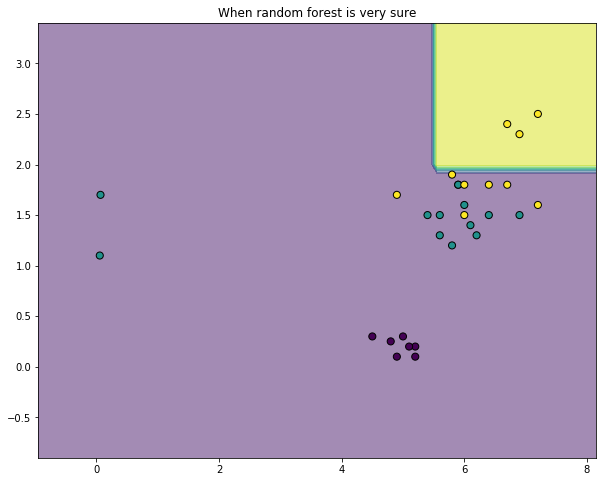

In [124]:
visualize_decision_boundaries(hum_readable_rule, 0, 3)

In [84]:
rule_dict = {}
var_dict = {}

rules, s_rules = combine_forest_rules(rfclf, "Iris-setosa", rule_dict, var_dict)
rules

A3DFB7A
A4BB84D
A26C616
(A3DFB7A & A4794FB) | (A4BB84D & ~A4794FB)
A26C616


{'(A3DFB7A & A4794FB) | (A4BB84D & ~A4794FB)', 'A26C616', 'A3DFB7A', 'A4BB84D'}

In [85]:
s_rules

{'(A3DFB7A & A4794FB) | (A4BB84D & ~A4794FB)', 'A26C616', 'A3DFB7A', 'A4BB84D'}

In [86]:
s = combine_rule_using_and(s_rules)
s

'(A26C616) & (A3DFB7A) & ((A3DFB7A & A4794FB) | (A4BB84D & ~A4794FB)) & (A4BB84D)'

In [87]:
expr(s).to_dnf()

Or(And(A26C616, A3DFB7A, A4794FB, A4BB84D), And(A26C616, A3DFB7A, ~A4794FB, A4BB84D))

In [88]:
s = expr(s).to_cnf()
s

And(A26C616, A3DFB7A, A4BB84D)

In [89]:
simplified_func = convert_to_function('&', s)
simplified_func

'A26C616 & A3DFB7A & A4BB84D'

In [90]:
sys_readable_rule = print_final_rule(simplified_func)
sys_readable_rule

"(3, '<=', 0.8) & (3, '<=', 0.7) & (3, '<=', 0.75)"

In [91]:
hum_readable_rule = get_valid_predicate(sys_readable_rule)
hum_readable_rule

'(petal_width_cm <= 0.8) and (petal_width_cm <= 0.7) and (petal_width_cm <= 0.75)'

In [92]:
compute_final_rule_accuracy(0, hum_readable_rule)

{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7}


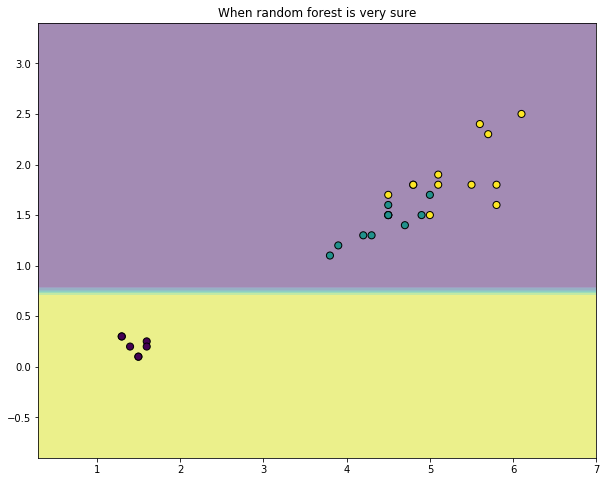

In [94]:
visualize_decision_boundaries(hum_readable_rule, 2, 3)

In [95]:
rule_dict = {}
var_dict = {}

rules, s_rules = combine_forest_rules(rfclf, "Iris-versicolor", rule_dict, var_dict)
rules

(AB152CE & AF6D196) | (A6A4D95 & A975D11 & AF6D196 & ~AB152CE)
(A8F00EB & AB152CE) | (A06E857 & A1C265A & A8F00EB & ~AB152CE)
(A1C265A & A9BA801 & ~A7D406F) | (A1C265A & A7D406F & A9BA801 & A9C4782)
(A8F00EB & ~AB33740) | (A06E857 & A1C265A & AB33740 & AF6D196)
(A9BA801 & AB152CE) | (A3A054A & A9BA801 & AB7ACBB & ~AB152CE)


{'(A1C265A & A9BA801 & ~A7D406F) | (A1C265A & A7D406F & A9BA801 & A9C4782)',
 '(A8F00EB & AB152CE) | (A06E857 & A1C265A & A8F00EB & ~AB152CE)',
 '(A8F00EB & ~AB33740) | (A06E857 & A1C265A & AB33740 & AF6D196)',
 '(A9BA801 & AB152CE) | (A3A054A & A9BA801 & AB7ACBB & ~AB152CE)',
 '(AB152CE & AF6D196) | (A6A4D95 & A975D11 & AF6D196 & ~AB152CE)'}

In [96]:
s_rules

{'(A8F00EB | AB33740) & (A06E857 | ~AB33740) & (A1C265A | ~AB33740) & (AF6D196 | ~AB33740)',
 'A1C265A & A9BA801 & (A9C4782 | ~A7D406F)',
 'A8F00EB & (A06E857 | AB152CE) & (A1C265A | AB152CE)',
 'A9BA801 & (A3A054A | AB152CE) & (AB152CE | AB7ACBB)',
 'AF6D196 & (A6A4D95 | AB152CE) & (A975D11 | AB152CE)'}

In [97]:
s = combine_rule_using_and(s_rules)
s

'(AF6D196 & (A6A4D95 | AB152CE) & (A975D11 | AB152CE)) & (A1C265A & A9BA801 & (A9C4782 | ~A7D406F)) & (A8F00EB & (A06E857 | AB152CE) & (A1C265A | AB152CE)) & (A9BA801 & (A3A054A | AB152CE) & (AB152CE | AB7ACBB)) & ((A8F00EB | AB33740) & (A06E857 | ~AB33740) & (A1C265A | ~AB33740) & (AF6D196 | ~AB33740))'

In [98]:
s = expr(s).to_cnf()
s

In [100]:
simplified_func = convert_to_function('&', s)
simplified_func

'AF6D196 & A1C265A & A9BA801 & A8F00EB & (AB152CE | A3A054A) & (A6A4D95 | AB152CE) & (AB152CE | A975D11) & (AB152CE | AB7ACBB) & (A06E857 | ~AB33740) & (AB152CE | A06E857) & (A9C4782 | ~A7D406F)'

In [101]:
sys_readable_rule = print_final_rule(simplified_func)
sys_readable_rule

"(3, '>', 0.7) & (3, '<=', 1.7) & (3, '>', 0.8) & (3, '>', 0.75) & ((2, '<=', 4.75) | (3, '<=', 1.65)) & ((3, '<=', 1.9) | (2, '<=', 4.75)) & ((2, '<=', 4.75) | (1, '<=', 2.55)) & ((2, '<=', 4.75) | (2, '<=', 4.95)) & ((2, '<=', 5.35) | (0, '<=', 5.55)) & ((2, '<=', 4.75) | (2, '<=', 5.35)) & ((2, '<=', 5.0) | (0, '<=', 6.2))"

In [102]:
hum_readable_rule = get_valid_predicate(sys_readable_rule)
hum_readable_rule

'(petal_width_cm > 0.7) and (petal_width_cm <= 1.7) and (petal_width_cm > 0.8) and (petal_width_cm > 0.75) and ((petal_length_cm <= 4.75) or (petal_width_cm <= 1.65)) and ((petal_width_cm <= 1.9) or (petal_length_cm <= 4.75)) and ((petal_length_cm <= 4.75) or (sepal_width_cm <= 2.55)) and ((petal_length_cm <= 4.75) or (petal_length_cm <= 4.95)) and ((petal_length_cm <= 5.35) or (sepal_length_cm <= 5.55)) and ((petal_length_cm <= 4.75) or (petal_length_cm <= 5.35)) and ((petal_length_cm <= 5.0) or (sepal_length_cm <= 6.2))'

In [103]:
compute_final_rule_accuracy(1, hum_readable_rule)

{'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 10}


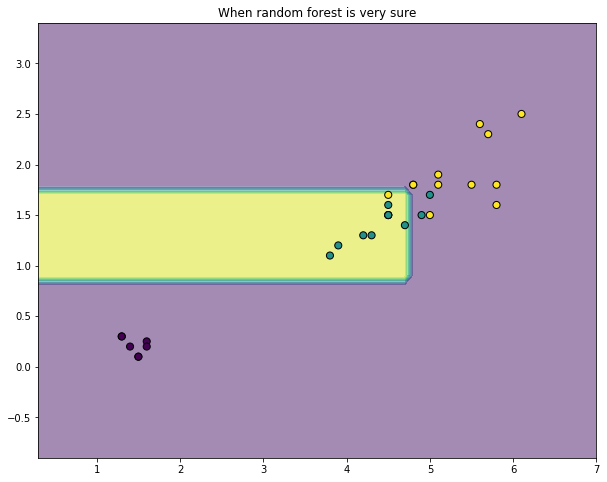

In [105]:
visualize_decision_boundaries(hum_readable_rule, 2, 3)

### Create & simplify big and rule

In [ ]:
# Restart dictionaries
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_and_rule(rules_set), evaluate=False)

# Then, apply simplification function to it.
l = simplify_logic(simplified)

if l:
    out = print_final_rule(l)
else:
    out = print_final_rule(simplified)
    
print(out)

In [ ]:
rule_dict

In [ ]:
var_dict

In [ ]:
rules_set = {
    ((0, 3, '>', 0.8), (2, 3, '<=', 1.7), (3, 2, '>', 5.0), (5, -2, '>', -2.0)),
 ((0, 3, '>', 0.8), (2, 3, '>', 1.7), (6, -2, '>', -2.0))
}

In [ ]:
rules_set

### Create & simplify big OR rule

In [ ]:
# Restart dictionaries
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_or_rule(rules_set), evaluate=False)

# Then, apply simplification function to it.
l = simplify_logic(simplified)

# The print the final big rule, to interpret the decision three
print_final_rule(l)

In [ ]:
out

In [ ]:
feature_names_array

In [ ]:
match = s.evaluate({'petal_width_cm': 2.0, 'petal_length_cm': 5.0})

In [ ]:
match

In [ ]:
Z = np.array(rule_predict(2, set()))

In [ ]:
Z

## Vizualizacia generovanych pravidiet pre klasifikaciu iris datasetu

In [ ]:
feature_names_array

In [ ]:
print_decision_boundaries(2, '(petal_length_cm > 4.75) and (petal_width_cm > 1.7) and ((petal_width_cm <= 1.7) or (petal_length_cm > 2.45)) and ((petal_length_cm > 2.6) or (petal_length_cm > 4.85)) and ((petal_width_cm > 1.7) or (petal_length_cm > 5.0)) and ((petal_width_cm > 1.7) or ((petal_width_cm > 0.8) and (petal_length_cm > 5.0))) and ((petal_width_cm > 1.7) or ((petal_width_cm > 0.7) and (petal_length_cm > 5.0)))')

### Porovnanie vysledkov medzi random forestom a vygenerovanymi pravidlami
#### Random Forest

In [ ]:
print(accuracy_score(Y_validation, pred))
print(classification_report(Y_validation, pred))

#### Vygenerovane pravidla

In [ ]:
predict_rule_class(rules_set)

In [ ]:
1) Confusion matrix
2) Random forest pravdepodobnosti klasifikacii pozriet !!
3) Urobit support pre jednotlive pravidla
4) Forest cover dataset
5) Porovnat pyeda a sympy

#### Vizualizacia pravidiel random forestu

IndexError: index 2 is out of bounds for axis 0 with size 2

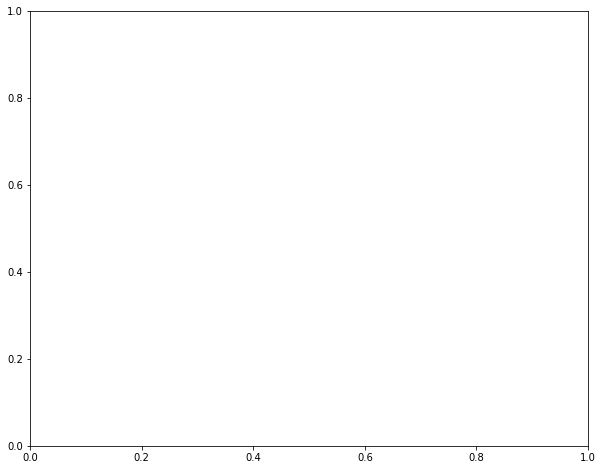

In [125]:
rules_set = {
    (0, '(petal_width_cm <= 0.8) and (petal_length_cm <= 2.45) and (petal_length_cm <= 2.6) and (petal_width_cm <= 0.75)'),
    (1, '(petal_width_cm <= 1.7) and (petal_width_cm > 0.8) and (petal_length_cm <= 5.35) and (petal_length_cm > 2.45) and (petal_length_cm > 2.6) and ((petal_width_cm > 1.35) or (petal_width_cm > 0.75)) and ((petal_width_cm <= 1.35) or (petal_length_cm <= 4.95))'),
    (2, '(petal_width_cm > 1.7) and (petal_length_cm > 2.45) and (petal_length_cm > 2.6)')
}

X = X_validation
Y = Y_validation

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(figsize=(10, 8))

ravel_ = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predicate_rules_set_predict(rules_set, ravel_))
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
axarr.set_title("Rules predictions")

plt.show()

#### Vizualizacia random forestu

In [ ]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets

X = X_validation
Y = Y_validation

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(figsize=(10, 8))

Z = rfclf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
axarr.set_title("Random Forest")

plt.show()

### Generate prunned rules for 'Iris-setosa' class and assign them accuracy

In [ ]:
p = get_pruned_rules_accuracy("Iris-virginica", rfclf)
p

### Test those pruned rules accuracy agaist predicting other class

In [ ]:
for rule in p:
    rule = list(rule)
    print(compute_rule_accuracy(get_class_index("Iris-versicolor"), rule[1]))

### Get accuracy for generated rules, without prunning

In [ ]:
p2 = get_rules_accuracy("Iris-virginica", rfclf)
p2

In [ ]:
# No redundancy
p2 = get_rules_accuracy("Iris-virginica", rfclf, True)
p2

-------

In [ ]:
2) Najst pravidlo ktore to blokuje.

In [ ]:
rules, s_rules = combine_forest_rules(rfclf, "Iris-virginica")
rules = combine_rule_using_and(rules)
rules

In [ ]:
s_rules = sympify(s_rules, evaluate=False)
s_rules

In [ ]:
t = simplify_logic(s_rules)

## Zakomponovanie jedneho velkeho pravidla zo vsetkych vygenerovanych random forestom

In [ ]:
rf_rules_set = combine_rules("Iris-virginica", rfclf)

In [ ]:
rf_rules_set

In [ ]:
l = sympify(create_big_or_rule(rf_rules_set), evaluate=False)

In [ ]:
print_final_rule(l)

In [ ]:
sympify(create_big_or_rule(rf_rules_set), evaluate=False)

In [ ]:
l_and = sympify(create_big_and_rule(rf_rules_set), evaluate=False)
print_final_rule(l_and)

Remove redundant conditions from each rule

In [ ]:
_rf_rules_set = redundancy_condition_removal(rf_rules_set)
_rf_rules_set

In [ ]:
_l_and = sympify(create_big_and_rule(_rf_rules_set), evaluate=False)
print_final_rule(_l_and)

In [ ]:
rules = {tuple(list(map(lambda x: eval(x), l_and_final.split(" & "))))}
rules

In [ ]:
rules = redundancy_condition_removal(rules)
rules

In [ ]:
X = X_train[0:, [2, 3]]
Y = Y_train

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(figsize=(10, 8))

print(np.c_[xx.ravel(), yy.ravel()])

Z = np.array(predicate_rule_predict(2, "petal_width_cm > 1.7 and petal_length_cm > 2.6", np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
axarr.set_title(tt)

plt.show()

In [ ]:
feature_names_array

### Here we try to create one big and rule

In [ ]:
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_or_rule(_rf_rules_set), evaluate=False)

# Then, apply simplification function to it.
#l = simplify_logic(simplified)

print_final_rule(simplified)

In [ ]:
(petal_length_cm > 5.35) or (petal_width_cm > 1.65) or (petal_width_cm < 1.7) or (petal_length_cm > 4.85 and petal_width_cm <= 1.55)

### Try to visualize this rule

In [ ]:
X = X_train[0:, [2, 3]]
Y = Y_train

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(figsize=(10, 8))

print(np.c_[xx.ravel(), yy.ravel()])

#Z = np.array(rule_predict(2, "(petal_length_cm > 5.0 or petal_length_cm < 3.0) and (petal_width_cm > 1.7)", np.c_[xx.ravel(), yy.ravel()]))
Z = np.array(predicate_rule_predict(2, "(petal_length_cm > 5.35) or (petal_width_cm > 1.65) or (petal_width_cm < 1.7) or (petal_length_cm > 4.85 and petal_width_cm <= 1.55)", np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
axarr.set_title(tt)

plt.show()

In [ ]:
Z

### Here on the same dataset we try to create one big or rule

In [ ]:
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_or_rule(_rf_rules_set), evaluate=False)

# Then, apply simplification function to it.
l = simplify_logic(simplified)
 t
print_final_rule(l)

In [ ]:
"(petal_length_cm, '>', 4.95) | (petal_width_cm, '>', 1.7)"

In [ ]:
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_or_rule(rf_rules_set), evaluate=False)

# Then, apply simplification function to it.
l = simplify_logic(simplified)

print_final_rule(l)

In [ ]:
# Je mozne odstranit (0, 3, '<=', 0.8) alebo (0, 3, '<=', 0.75) ? 

----

## Getting paths for each tree

In [ ]:
viz_tree(rfclf.estimators_[0], data['class'].unique(), feature_names_array)

In [ ]:
# Final combined rules generated by Random Forest and reduced

"(petal_length_cm, '>', 4.95) | (petal_width_cm, '>', 1.7)"

In [ ]:
rfclf.estimators_[0].tree_.feature

In [ ]:
data['class'].unique()

In [ ]:
lst = []
t1_paths = set()

get_paths_for("Iris-virginica", rfclf.estimators_[0].tree_, 0, lst, t1_paths, '<=')
t1_paths

In [ ]:
create_big_or_rule(t1_paths)

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False)))

In [ ]:
t1_paths = redundancy_condition_removal(t1_paths)
t1_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False)))

---
## Subtree 2

In [ ]:
viz_tree(rfclf.estimators_[1], data['class'].unique(), feature_names_array)

In [ ]:
# Final combined rules generated by Random Forest and reduced

"(petal_length_cm, '>', 4.95) | (petal_width_cm, '>', 1.7)"

In [ ]:
rfclf.estimators_[1].tree_.feature

In [ ]:
lst = []
t2_paths = set()

get_paths_for("Iris-virginica", rfclf.estimators_[1].tree_, 0, lst, t2_paths, '<=')
t2_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t2_paths), evaluate=False)))

### Now we try to remove redundant nodes

In [ ]:
t2_paths = redundancy_condition_removal(t2_paths)
t2_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t2_paths), evaluate=False)))

In [ ]:
3) Draw descision boundaries.
4) Moon dataset generator.

---
## Subtree 3

In [ ]:
viz_tree(rfclf.estimators_[2], data['class'].unique(), feature_names_array)

In [ ]:
# Final combined rules generated by Random Forest and reduced

"(petal_length_cm, '>', 4.95) | (petal_width_cm, '>', 1.7)"

In [ ]:
rfclf.estimators_[2].tree_.feature

In [ ]:
lst = []
t3_paths = set()

get_paths_for("Iris-virginica", rfclf.estimators_[2].tree_, 0, lst, t3_paths, '<=')
t3_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t3_paths), evaluate=False)))

In [ ]:
t3_paths = redundancy_condition_removal(t3_paths)
t3_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t3_paths), evaluate=False)))

---
## Subtree 4

In [ ]:
viz_tree(rfclf.estimators_[3], data['class'].unique(), feature_names_array)

In [ ]:
# Final combined rules generated by Random Forest and reduced

"(petal_length_cm, '>', 4.95) | (petal_width_cm, '>', 1.7)"

In [ ]:
rfclf.estimators_[3].tree_.feature

In [ ]:
lst = []
t4_paths = set()

get_paths_for("Iris-virginica", rfclf.estimators_[3].tree_, 0, lst, t4_paths, '<=')
t4_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t4_paths), evaluate=False)))

---
## Subtree 5

In [ ]:
viz_tree(rfclf.estimators_[4], data['class'].unique(), feature_names_array)

In [ ]:
# Final combined rules generated by Random Forest and reduced

"(petal_length_cm, '>', 4.95) | (petal_width_cm, '>', 1.7)"

In [ ]:
lst = []
t5_paths = set()

get_paths_for("Iris-setosa", rfclf.estimators_[4].tree_, 0, lst, t5_paths, '<=')
t5_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t5_paths), evaluate=False)))

In [ ]:
t5_paths = redundancy_condition_removal(t5_paths)
t5_paths

In [ ]:
rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print_final_rule(simplify_logic(sympify(create_big_or_rule(t5_paths), evaluate=False)))

----
### Iris-Setosa

In [ ]:
viz_tree(rfclf.estimators_[0], data['class'].unique(), feature_names_array)

In [ ]:
lst = []
t1_paths = set()
get_paths_for("Iris-setosa", rfclf.estimators_[0].tree_, 0, lst, t1_paths, '<=')
print("Paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified Rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))


# ------- Redundancy removal ------- #
t1_paths = redundancy_condition_removal(t1_paths)
print(" ")
print("Redundant conditions removed paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified after redudancy rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))

##### Subtree 2

In [ ]:
viz_tree(rfclf.estimators_[1], data['class'].unique(), feature_names_array)

In [ ]:
lst = []
t1_paths = set()
get_paths_for("Iris-setosa", rfclf.estimators_[1].tree_, 0, lst, t1_paths, '<=')
print("Paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified Rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))


# ------- Redundancy removal ------- #
t1_paths = redundancy_condition_removal(t1_paths)
print(" ")
print("Redundant conditions removed paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified after redudancy rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))

##### Subtree 3

In [ ]:
viz_tree(rfclf.estimators_[2], data['class'].unique(), feature_names_array)

In [ ]:
lst = []
t1_paths = set()
get_paths_for("Iris-setosa", rfclf.estimators_[2].tree_, 0, lst, t1_paths, '<=')
print("Paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified Rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))


# ------- Redundancy removal ------- #
t1_paths = redundancy_condition_removal(t1_paths)
print(" ")
print("Redundant conditions removed paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified after redudancy rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))

##### Subtree 4

In [ ]:
viz_tree(rfclf.estimators_[3], data['class'].unique(), feature_names_array)

In [ ]:
lst = []
t1_paths = set()
get_paths_for("Iris-setosa", rfclf.estimators_[3].tree_, 0, lst, t1_paths, '<=')
print("Paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified Rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))


# ------- Redundancy removal ------- #
t1_paths = redundancy_condition_removal(t1_paths)
print(" ")
print("Redundant conditions removed paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified after redudancy rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))

##### Subtree 5

In [ ]:
viz_tree(rfclf.estimators_[4], data['class'].unique(), feature_names_array)

In [ ]:
lst = []
t1_paths = set()
get_paths_for("Iris-setosa", rfclf.estimators_[4].tree_, 0, lst, t1_paths, '<=')
print("Paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified Rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))


# ------- Redundancy removal ------- #
t1_paths = redundancy_condition_removal(t1_paths)
print(" ")
print("Redundant conditions removed paths= ")
print(t1_paths)


rule_dict = {}
var_dict = {}

# Simplify rule sets for this rf tree
print(" ")
print("Simplified after redudancy rules= ")
print(print_final_rule(simplify_logic(sympify(create_big_or_rule(t1_paths), evaluate=False))))

## TODO: Skusit urobit funkciu ktoru bude mozno hodit do sympify
- Tato funkcia bude brat ako parametre simplified rules a redundancy simplified rules s ktorych urobi dalsi simplify

In [ ]:
rf_rules_set = combine_rules("Iris-setosa", rfclf)
rf_rules_set

### Try to get one big rule from all generated rules

In [ ]:
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_or_rule(rf_rules_set), evaluate=False)

# Then, apply simplification function to it.
l = simplify_logic(simplified)

print_final_rule(l)

## Redundancy remove

In [ ]:
_rf_rules_set = redundancy_condition_removal(rf_rules_set)
_rf_rules_set

### Try to get one big rule from all redudancy removed rules

In [ ]:
rule_dict = {}
var_dict = {}

# First create one big expression from all rules
simplified = sympify(create_big_or_rule(_rf_rules_set), evaluate=False)

# Then, apply simplification function to it.
l = simplify_logic(simplified)

print_final_rule(l)

------

# Problems
1. Extremne pomale
2. Nie vzdy po urobeni redundancy removal je redukoanie vyrazu optimalne
3. Da sa nieco robit s tym post-rule-prunning
4. Hypoteza?
5. Redudancy removal z finalenho vyrazu
6. Zlucovat podobne vyrazy medzi sebou?
    a) (2 <= 5.6) & (1 > 1.5)
    b) (2 <= 1.4) & (1 > 1.8)

In [ ]:
------
1) Co v pripade ked pouzijem AND aby som spojil do jedneho velkeho pravidla, a vznikne negacia? A > 1.7 & A <= 1.7
2) Ako vizualizovat viacero atributov (mozno nieco s PCA)? (Answer: data generators - datasets)
3) Mal by vizualizovat tie vygenerovane pravidla, alebo predikcie ktore tieto davaju? (2 obrazky cez, alpha)
4) Co s vygenerovanymi vizualizaciami?
5) Ako skombinovat vsetko (prunning, redundacny removal, ohodnotenie pravidiel) (vizualizacie?)
6) Zavisi dolezitost atributu od hlbky kde je pouzity v strome? (dobry napad pre buducnost)
7) Diamonds: https://www.kaggle.com/shivam2503/diamonds ?
8) Ked mam A * !A tak toto mozem vyhodit?

------
> Diamant dataset.
> Neda sa najst jedoduchsia forma, lebo sa tie pravidla biju medzi sebou, (do praci zahrnut).

In [ ]:
### Co tu? Poniekedy je to_dnf() najkradsie, poniekedy to_dnf().to_cnf() alebo iba to_cnf()?

## TODO:
1) Redundancy removal z finalneho pravidla
2) Vypisat najlepsie pravidla v ramci experimentu
3) Dorobit funkciu ktora zjednoti vygenerovane pravidla pre vsetky classy a vyhodi vizualizaciu + presnost
4) Dorobit funkciu explain
5) Skusit spustit na diamond datasete
6) Skusit na moon datasete
7) 